In [160]:
import pandas as pd
import numpy as np

#### Exploratory data analysis
- check columns
- check dtypes
- check NaN values
- describe cleaned data
- plot correlation matrix

In [161]:
# only use the csv since its the same data then the xlsx file

with open("data/measurements.csv", 'rb') as file: # load csv
    data = pd.read_csv(file)

# comment first steps to clean notebook

# display(data.head(50)) # first column check
print(data.shape)
display(data.head(10)) # overview
display(data.dtypes) # check dtypes
data.isnull().sum() # check NaN values

(388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

First steps for cleaning the columns

- **distance**: distance per trip - replace "," with "." and transform to float
- **consume**: avg consumption per 100km - replace "," with "." and transform to float
- **speed**: avg speed per trip
- **temp_inside**: replace "," with "." and transform to float, fill NaN values with median
- **temp_outside**: 
- **specials**: unknown - replace NaN values with "None", show unique values
- **gas_type**: show unique values
- **AC**: AC on or off
- **rain**: weather conditions
- **sun**: weather conditions
- **refill liters**: replace NaN values with "None", snake case
- **refill gas**: replace NaN values with "None", snake case

In [162]:
data.rename(columns={'refill liters': 'refill_liters', 'refill gas': 'refill_gas'}, inplace=True) # change columns names to snake_case format

In [163]:
# replacing commas and change dtype

data['distance'] = data['distance'].str.replace(',', '.').astype(float)
data['consume'] = data['consume'].str.replace(',', '.').astype(float)
data['temp_inside'] = data['temp_inside'].str.replace(',', '.').astype(float)

In [164]:
# replacing NaN values

data['temp_inside'].fillna(data['temp_outside'].median(), inplace=True)
data['specials'].fillna('None', inplace=True)
# data['refill_liters'].fillna('None', inplace=True)
# data['refill_gas'].fillna('None', inplace=True)

In [165]:
data.describe().T # describe data

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.560567,2.294712,10.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


- **Distance**: from 1.3 to 216.1 km, with a mean of approximately 19.65 km
- **Consume**: varies from 3.3 to 12.2 L/100km, with a mean around 4.91 L/100km
- **Speed**: ranges from 14 to 90 km/h, with a mean of 41.9 km/h
- **Temp_inside**: varies from 19.0 to 25.5°C, with a median of 22.0°C
- **Temp_outside**: ranges from -5 to 31°C, with a median of 10.0°C

In [166]:
# !pip install seaborn

In [167]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [168]:
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(include=object)

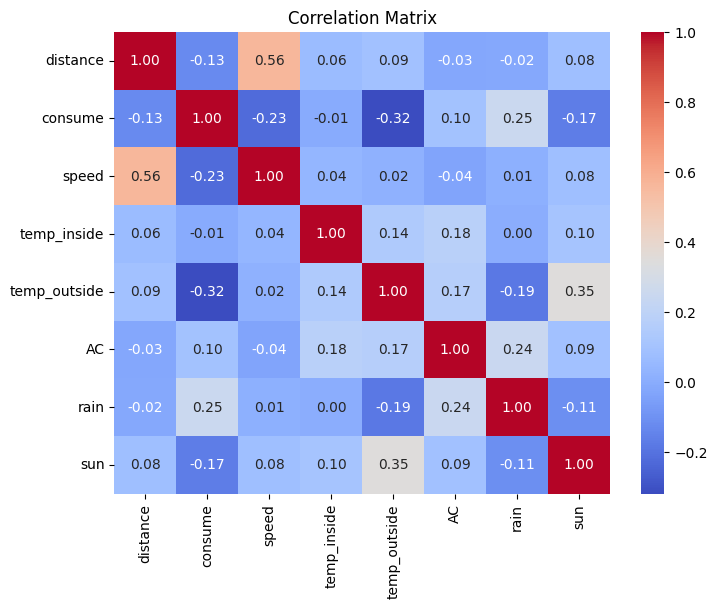

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- **Distance and Speed**: Positive correlation (0.56), meaning greater distances tend to have higher average speeds.
- **Consume and Temp_outside**: Negative correlation (-0.32), implying that lower outside temperatures may lead to higher fuel consumption.
- **Consume and Rain**: Positive correlation (0.25), indicating that fuel consumption may be higher when it's raining.

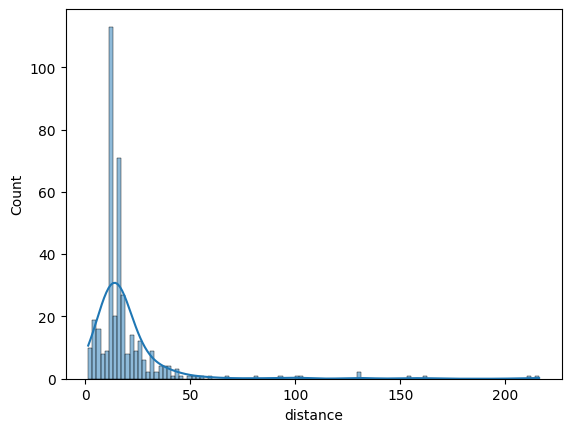

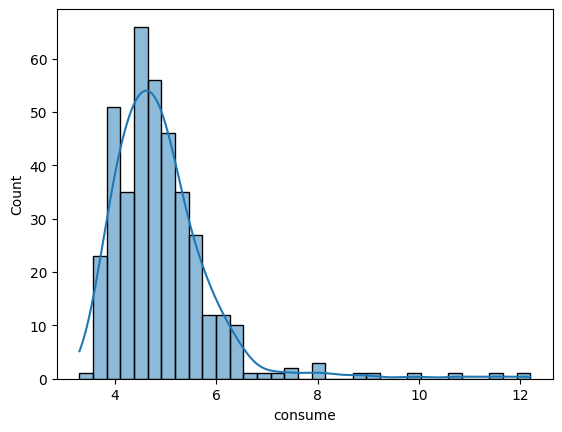

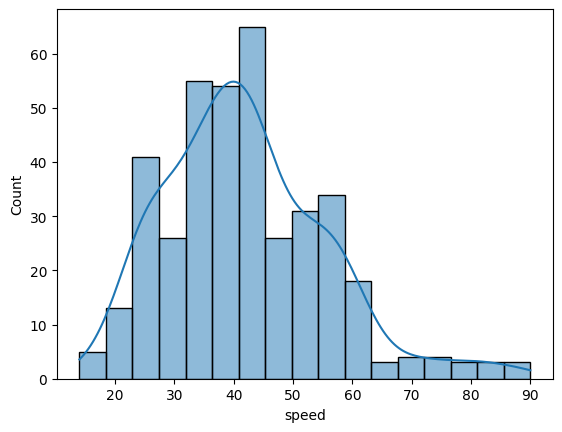

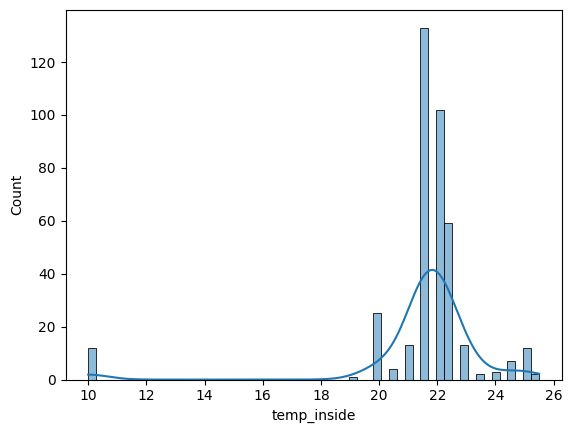

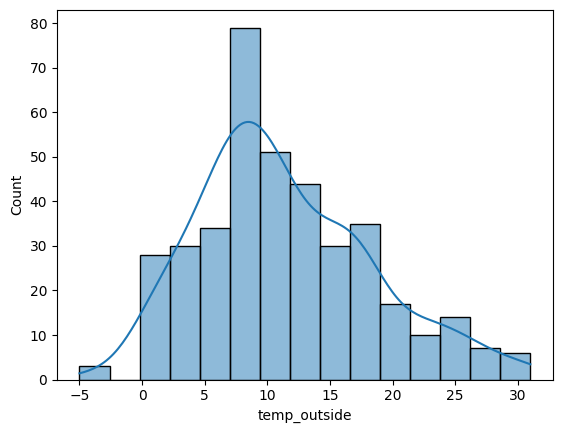

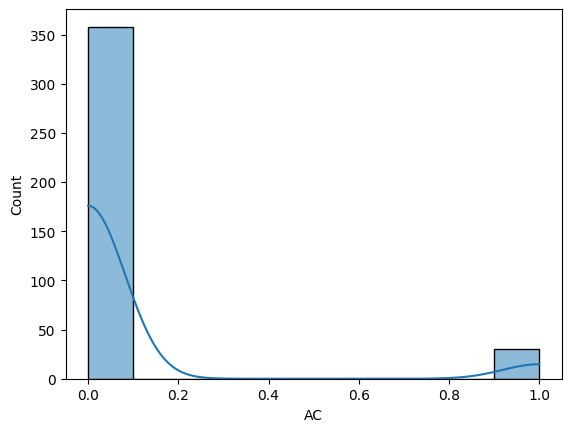

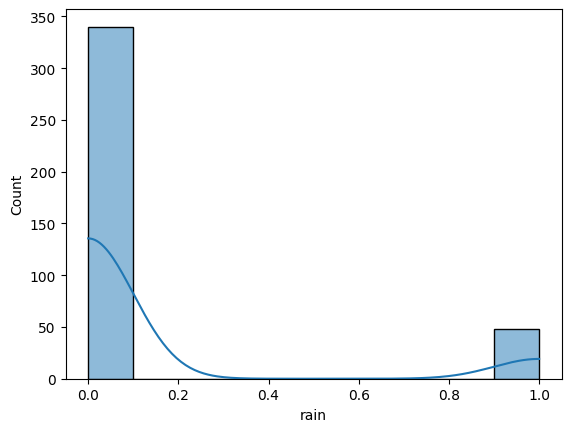

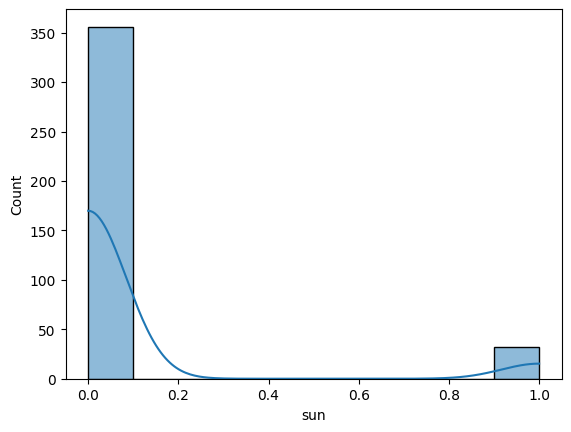

In [170]:
columns = numerical_data.columns

for column in columns:
    sns.histplot(numerical_data[column], kde=True)
    plt.show()

In [171]:
columns = categorical_data.columns

for column in columns:
    display(categorical_data[column].value_counts())

specials
None                  295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: count, dtype: int64

gas_type
SP98    228
E10     160
Name: count, dtype: int64

refill_liters
45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: count, dtype: int64

refill_gas
SP98    8
E10     5
Name: count, dtype: int64

Exclude following columns: specials, refill_liters, refill_gas

In [172]:
clean_data = data.drop(['specials', 'refill_liters', 'refill_gas'], axis=1) # drop columns

In [173]:
pivot_table_gas_type = clean_data.pivot_table(index='gas_type', aggfunc=['mean', 'min', 'max']) # create pivot table to compare both gas types

pivot_table_gas_type.T

gas_type                 E10        SP98
mean AC              0.04375    0.100877
     consume         4.93125    4.899123
     distance       21.09625   18.639912
     rain            0.10000    0.140351
     speed          43.50625   40.820175
     sun             0.07500    0.087719
     temp_inside    21.69375   21.467105
     temp_outside   10.11875   12.228070
min  AC              0.00000    0.000000
     consume         3.70000    3.300000
     distance        1.70000    1.300000
     rain            0.00000    0.000000
     speed          14.00000   16.000000
     sun             0.00000    0.000000
     temp_inside    10.00000   10.000000
     temp_outside   -5.00000   -3.000000
max  AC              1.00000    1.000000
     consume        10.80000   12.200000
     distance      130.30000  216.100000
     rain            1.00000    1.000000
     speed          88.00000   90.000000
     sun             1.00000    1.000000
     temp_inside    25.00000   25.500000
     temp_outside   27.00000   31.000000

Compare both gas types

- **Fuel Consumption (consume)**: Both gas types have similar average consumption
- **Distance (distance)**: Slightly longer trips on average for E10
- **Speed (speed)**: A bit higher average speed for E10
- **Temperature Inside and Outside**: Similar for both gas types
- **Air Conditioning , Rain , Sun**: Similar distributions for these binary features across both gas types

#### Hypothesis testing for consumption 
Create 3 speed clusters and test if the consumption is different for the two gas types

**Null Hypothesis (H0):**
The mean fuel consumption is the same for both gas types E10 and SP98 within each speed cluster (Low, Medium, High).

**Alternative Hypothesis (H1):**
The mean fuel consumption is different for the two gas types E10 and SP98 within each speed cluster (Low, Medium, High).

In [174]:
# Defining speed clusters based on quantiles: Low, Medium, High
speed_quantiles = clean_data['speed'].quantile([0.33, 0.66])
low_speed = clean_data[clean_data['speed'] <= speed_quantiles[0.33]]
medium_speed = clean_data[(clean_data['speed'] > speed_quantiles[0.33]) & (clean_data['speed'] <= speed_quantiles[0.66])]
high_speed = clean_data[clean_data['speed'] > speed_quantiles[0.66]]

In [175]:
from scipy.stats import ttest_ind
t_test_results = {}
for speed_cluster, clean_data in {'Low Speed': low_speed, 'Medium Speed': medium_speed, 'High Speed': high_speed}.items():
    consume_E10 = clean_data[clean_data['gas_type'] == 'E10']['consume']
    consume_SP98 = clean_data[clean_data['gas_type'] == 'SP98']['consume']
    t_stat, p_value = ttest_ind(consume_E10, consume_SP98)
    t_test_results[speed_cluster] = {'T-Statistic': t_stat, 'P-Value': p_value}

t_test_results

{'Low Speed': {'T-Statistic': 0.131003516704799,
  'P-Value': 0.8959633110589449},
 'Medium Speed': {'T-Statistic': 1.7169921418843614,
  'P-Value': 0.08862665519552212},
 'High Speed': {'T-Statistic': 0.07412398402318664,
  'P-Value': 0.9410283553401358}}

##### **Low Speed**
T-Statistic: 0.13
P-Value: 0.90

The p-value of 0.90 is much greater than the conventional threshold of 0.05, failing to reject the null hypothesis. Therefore, there's not enough evidence to suggest that fuel consumption differs between E10 and SP98 for low-speed trips.

##### **Medium Speed**
T-Statistic: 1.72
P-Value: 0.089

The p-value of 0.089 is close but still greater than 0.05, failing to reject the null hypothesis. There's not enough evidence to claim a difference in fuel consumption between E10 and SP98 for medium-speed trips.

##### **High Speed**
T-Statistic: 0.074
P-Value: 0.94

The p-value of 0.94 is much greater than 0.05, failing to reject the null hypothesis. Therefore, there's not enough evidence to suggest that fuel consumption differs between E10 and SP98 for high-speed trips.







In [176]:
# Given current gas prices in Euros per liter
price_E10 = 1.830  # price per liter for E10
price_SP98 = 1.960  # price per liter for SP98

display(clean_data)
# Calculating consumption per trip in liters
clean_data['consume_per_trip'] = (clean_data['consume'] / 100) * clean_data['distance']

# Calculating cost per trip based on current gas prices
def add_trip_cost(row):
    consumption = row['consume_per_trip']
    if row["gas_type"] == "E10":
        trip_cost = consumption * price_E10
    else: 
        trip_cost = consumption * price_SP98
    return trip_cost

clean_data['trip_cost'] = clean_data.apply(add_trip_cost, axis=1)
clean_data



,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
4,18.5,4.5,46,21.5,15,E10,0,0,0
5,8.3,6.4,50,21.5,10,E10,0,0,0
12,12.3,5.9,59,21.5,10,E10,0,0,0
13,24.7,5.1,58,21.5,12,E10,0,0,0
14,12.4,4.7,46,21.5,11,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
366,16.6,4.1,48,25.5,30,SP98,1,0,1
367,15.4,5.0,48,25.5,31,SP98,1,0,0
372,32.1,3.9,47,22.0,26,SP98,0,0,0
377,16.6,4.1,49,22.0,26,SP98,0,0,1


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_per_trip,trip_cost
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,1.523475
5,8.3,6.4,50,21.5,10,E10,0,0,0,0.5312,0.972096
12,12.3,5.9,59,21.5,10,E10,0,0,0,0.7257,1.328031
13,24.7,5.1,58,21.5,12,E10,0,0,0,1.2597,2.305251
14,12.4,4.7,46,21.5,11,E10,0,0,0,0.5828,1.066524
...,...,...,...,...,...,...,...,...,...,...,...
366,16.6,4.1,48,25.5,30,SP98,1,0,1,0.6806,1.333976
367,15.4,5.0,48,25.5,31,SP98,1,0,0,0.7700,1.509200
372,32.1,3.9,47,22.0,26,SP98,0,0,0,1.2519,2.453724
377,16.6,4.1,49,22.0,26,SP98,0,0,1,0.6806,1.333976


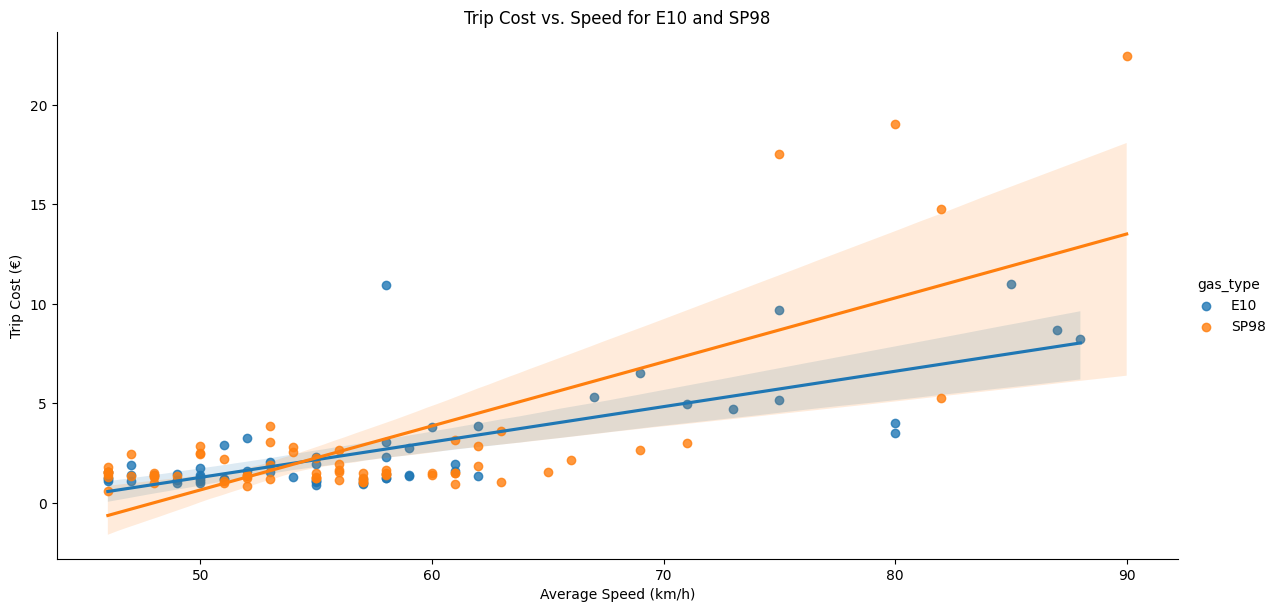

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'clean_data' is your DataFrame and it already has a 'trip_cost' column

sns.lmplot(x='speed', y='trip_cost', hue='gas_type', data=clean_data, aspect=2, height=6)
plt.title('Trip Cost vs. Speed for E10 and SP98')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Trip Cost (€)')

plt.show()


#### Trip Cost vs. Speed Plot
The plot suggests that SP98 tends to have higher trip costs at high speeds compared to E10. However, it's essential to note that there isn't sufficient data to definitively support this observation.

#### Recommendation
Given the lower price of E10 and the lack of a statistically significant difference in fuel consumption between the two gas types, E10 is recommended.

#### Next steps
The analysis was conducted under time constraints and did not include the effect of temperature on fuel consumption and trip cost. A more comprehensive analysis could look into this variable for a more holistic view.